In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv(r'C:\Users\jayes\Downloads\archive\abcnews-date-text.csv')
df.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


In [6]:
df.columns

Index(['publish_date', 'headline_text'], dtype='object')

In [7]:
df.dtypes

publish_date      int64
headline_text    object
dtype: object

In [8]:
df=df.sample(n=17000)

In [9]:
df.shape

(17000, 2)

In [10]:
df.head(3)

,publish_date,headline_text
505437,20091207,gunfire rings out during tehran protests
350124,20071212,shooting murder suspect joins most wanted list
172485,20050628,ogilivy shares top honours in us qualifier for


In [11]:
df.reset_index(inplace=True)

In [12]:
df.columns

Index(['index', 'publish_date', 'headline_text'], dtype='object')

In [13]:
df['publish_date'] = pd.to_datetime(df['publish_date'] , format='%Y%m%d')

In [14]:
df.head()

,index,publish_date,headline_text
0,505437,2009-12-07,gunfire rings out during tehran protests
1,350124,2007-12-12,shooting murder suspect joins most wanted list
2,172485,2005-06-28,ogilivy shares top honours in us qualifier for
3,1151206,2018-12-20,cwa calls for politicians to improve behaviour
4,252034,2006-07-27,market recovers from inflation blow


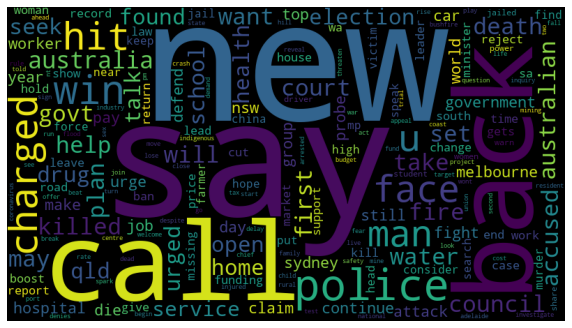

In [15]:
from wordcloud import WordCloud
plt.figure(figsize=(10,10))
word_cloud = WordCloud(background_color='black',height=450,width=800).generate(''.join(df['headline_text']))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()


In [16]:
df.head()

,index,publish_date,headline_text
0,505437,2009-12-07,gunfire rings out during tehran protests
1,350124,2007-12-12,shooting murder suspect joins most wanted list
2,172485,2005-06-28,ogilivy shares top honours in us qualifier for
3,1151206,2018-12-20,cwa calls for politicians to improve behaviour
4,252034,2006-07-27,market recovers from inflation blow


In [17]:
df.dtypes

index                     int64
publish_date     datetime64[ns]
headline_text            object
dtype: object

In [18]:
news =df['headline_text'].head(7)

In [19]:
news.head()

0          gunfire rings out during tehran protests
1    shooting murder suspect joins most wanted list
2    ogilivy shares top honours in us qualifier for
3    cwa calls for politicians to improve behaviour
4               market recovers from inflation blow
Name: headline_text, dtype: object

In [20]:
df.isnull().sum().sum()

0

In [21]:
from nltk.corpus import stopwords
sw = stopwords.words("english")
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [22]:
len(sw)

179

In [23]:
import string

def clean_text(msg):
    msg = msg.translate(str.maketrans(' ',' ', string.punctuation))
    msg = msg.lower()
    msg = msg.split(' ')
    words = [x for x in msg if x not in sw]
    return  ' '.join(msg)

df['cleaned_text']  = df['headline_text'].apply(clean_text)


In [24]:
df.head()

,index,publish_date,headline_text,cleaned_text
0,505437,2009-12-07,gunfire rings out during tehran protests,gunfire rings out during tehran protests
1,350124,2007-12-12,shooting murder suspect joins most wanted list,shooting murder suspect joins most wanted list
2,172485,2005-06-28,ogilivy shares top honours in us qualifier for,ogilivy shares top honours in us qualifier for
3,1151206,2018-12-20,cwa calls for politicians to improve behaviour,cwa calls for politicians to improve behaviour
4,252034,2006-07-27,market recovers from inflation blow,market recovers from inflation blow


In [25]:
df.tail()

,index,publish_date,headline_text,cleaned_text
16995,984390,2015-10-09,crows name former assistant don pyke as senior...,crows name former assistant don pyke as senior...
16996,904030,2014-09-19,traditional owners sign agreement with competi...,traditional owners sign agreement with competi...
16997,543768,2010-06-12,no apology for saying mps should be shot,no apology for saying mps should be shot
16998,614558,2011-05-18,hundreds voice anger at solar rebate cut,hundreds voice anger at solar rebate cut
16999,440394,2009-01-31,ten injured in melbourne tram collision,ten injured in melbourne tram collision


In [26]:
df.drop(columns=['headline_text','publish_date','index'],inplace=True)

In [27]:
df.head()

,cleaned_text
0,gunfire rings out during tehran protests
1,shooting murder suspect joins most wanted list
2,ogilivy shares top honours in us qualifier for
3,cwa calls for politicians to improve behaviour
4,market recovers from inflation blow


In [28]:
df['cleaned_text'][0:10]


0             gunfire rings out during tehran protests
1       shooting murder suspect joins most wanted list
2       ogilivy shares top honours in us qualifier for
3       cwa calls for politicians to improve behaviour
4                  market recovers from inflation blow
5        thousands turn out as arts festival kicks off
6            residents unhappy with powerline approval
7                head winds delay solo sailors arrival
8              princes hwy duplication brought forward
9    darwin port delays costing live exporters mill...
Name: cleaned_text, dtype: object

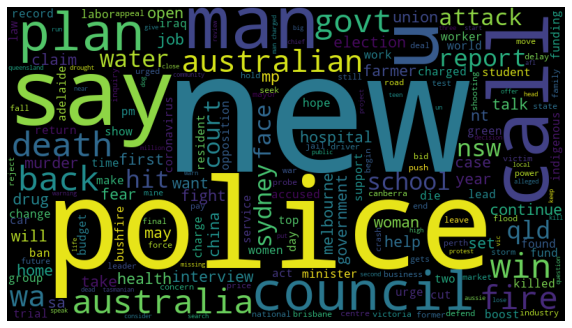

In [29]:
from wordcloud import WordCloud
plt.figure(figsize=(10,10))
Cloud_img=WordCloud(background_color='black',height=450,width=800).generate(' '.join(df['cleaned_text']))
plt.imshow(Cloud_img)
plt.axis('off')
plt.show()


In [30]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer_obj=Tokenizer()
tokenizer_obj.fit_on_texts(df['cleaned_text'])


In [31]:
tokenizer_obj.word_index

{'to': 1,
 'in': 2,
 'for': 3,
 'of': 4,
 'on': 5,
 'the': 6,
 'over': 7,
 'police': 8,
 'at': 9,
 'with': 10,
 'new': 11,
 'after': 12,
 'man': 13,
 'and': 14,
 'a': 15,
 'up': 16,
 'as': 17,
 'from': 18,
 'says': 19,
 'us': 20,
 'by': 21,
 'court': 22,
 'out': 23,
 'govt': 24,
 'be': 25,
 'not': 26,
 'council': 27,
 'australia': 28,
 'more': 29,
 'nsw': 30,
 'death': 31,
 'qld': 32,
 'interview': 33,
 'fire': 34,
 'australian': 35,
 'wa': 36,
 'charged': 37,
 'off': 38,
 'crash': 39,
 'health': 40,
 'sydney': 41,
 'plan': 42,
 'into': 43,
 'no': 44,
 'murder': 45,
 'water': 46,
 'day': 47,
 'down': 48,
 'is': 49,
 'back': 50,
 'south': 51,
 'call': 52,
 'report': 53,
 'calls': 54,
 'found': 55,
 'against': 56,
 'first': 57,
 'about': 58,
 'home': 59,
 'election': 60,
 'government': 61,
 'woman': 62,
 'coast': 63,
 'world': 64,
 'may': 65,
 'hospital': 66,
 'will': 67,
 'win': 68,
 'accused': 69,
 'north': 70,
 'china': 71,
 'killed': 72,
 'sa': 73,
 'school': 74,
 'melbourne': 75,
 '

In [32]:
vocabulary_size=len(tokenizer_obj.word_index)
print(f'The vocabulary size is {vocabulary_size}')

The vocabulary size is 16893


In [33]:
encoded_vec=[]
for text in df['cleaned_text']:
  encoded_vec.append(tokenizer_obj.texts_to_sequences([text])[0])

In [34]:
encoded_vec

[[5993, 3925, 23, 435, 5994, 823],
 [187, 45, 1077, 634, 789, 1597, 684],
 [8571, 635, 124, 1885, 2, 20, 4706, 3],
 [4707, 54, 3, 1484, 1, 1732, 2579],
 [99, 3331, 18, 2324, 1041],
 [476, 790, 23, 17, 2325, 496, 2580, 38],
 [142, 1886, 10, 3332, 1303],
 [333, 1391, 477, 4708, 3333, 5995],
 [3334, 1887, 5996, 3926, 1078],
 [285, 183, 478, 3927, 202, 3335, 824],
 [1888, 3928, 8572, 5997],
 [3929, 825, 15, 5998, 148, 685, 22],
 [400, 2899, 2094, 2, 139],
 [2900, 2095, 18, 2581, 3336, 2326],
 [8573, 4709, 7, 1598, 5999, 6000],
 [8574, 715, 242, 10, 566, 149],
 [62, 69, 4, 8, 211],
 [13, 37, 7, 6001, 8575, 15, 135],
 [8576, 869, 1, 436, 2, 75],
 [754, 870, 1, 1215, 1599, 1147, 2582, 1, 755],
 [6002, 8577, 3930, 16, 1392, 1393],
 [756, 99, 1, 871, 1042],
 [686, 3931, 535, 42],
 [3932, 1733, 1, 8578, 8579],
 [757, 925, 2901, 8580, 227],
 [1079, 1485, 437, 2, 1734, 8581],
 [165, 687, 307, 1, 6003, 124, 716],
 [2096, 91, 401],
 [661, 308, 1043, 688, 1304, 1394],
 [20, 1, 3337, 567, 791, 418],
 

In [35]:
max_len_vec=0
for values in encoded_vec:
  if len(values)>max_len_vec:
    max_len_vec=len(values)

In [36]:
print(f'max length of vector {max_len_vec}')

max length of vector 14


In [37]:
from tensorflow.keras.preprocessing.sequence import pad_sequences


padded_vec=pad_sequences(encoded_vec,maxlen=max_len_vec,padding='pre')

In [38]:
print(f"The padded vector is :- {padded_vec}")


The padded vector is :- [[   0    0    0 ...  435 5994  823]
 [   0    0    0 ...  789 1597  684]
 [   0    0    0 ...   20 4706    3]
 ...
 [   0    0    0 ...  551   25  350]
 [   0    0    0 ...  723 7227  191]
 [   0    0    0 ...   75 3249 1969]]


In [39]:
x=padded_vec[:,0:-1]
y=padded_vec[:,-1]

In [40]:
print(f'x={x}')
print(f'y={y}')

x=[[   0    0    0 ...   23  435 5994]
 [   0    0    0 ...  634  789 1597]
 [   0    0    0 ...    2   20 4706]
 ...
 [   0    0    0 ...  726  551   25]
 [   0    0    0 ...    9  723 7227]
 [   0    0    0 ...    2   75 3249]]
y=[ 823  684    3 ...  350  191 1969]


In [41]:
from tensorflow.keras.utils import to_categorical

y_cat = to_categorical(y,num_classes=vocabulary_size)


In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y_cat,test_size=0.20,random_state=42)


In [43]:
print(f'X_train shape{x_train.shape}')
print(f'X_test shape{x_test.shape}')
print(f'y_train shape{y_train.shape}')
print(f'y_test shape{y_test.shape}')

X_train shape(13600, 13)
X_test shape(3400, 13)
y_train shape(13600, 16893)
y_test shape(3400, 16893)


In [ ]:
from tensorflow import keras

model=keras.Sequential()
#Embedding layer
#input_dim is vocabulary_size + 1 because 0 is not considered when calculating vocab size
model.add(keras.layers.Embedding(input_dim=vocabulary_size+1,output_dim=20,input_length=max_len_vec-1,))#Bcz we have taken the last value as target label
model.add(keras.layers.LSTM(units=100))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(units=100,activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(units=vocabulary_size,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [ ]:
model.fit(x_train,y_train,epochs=3,validation_data=(x_test,y_test))


In [ ]:
def predict_next_word(seed_text):
  cleaned_text=clean_text(seed_text)
  token_list = tokenizer_obj.texts_to_sequences([cleaned_text])[0]
  token_list = pad_sequences([token_list], maxlen=max_len_vec-1, padding='pre')
  prediction = model.predict(token_list)
  predictions=np.argmax(prediction)
  predicted_word=tokenizer_obj.sequences_to_texts([[predictions]])[0]
  return seed_text+' '+predicted_word

In [ ]:
predict_next_word('today is')


In [ ]:
import pickle

model = pickle.load(open('model.pkl' , 'rb'))